# Exploring the data

This first section contains the utility functions to load the dataset to be used for our model training.

The dataset used for this project is the one published in the "[Challenges in Representation Learning: Facial Expression Recognition Challenge](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data)" by Kaggle.



## Data description

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

The csv file contains two main columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order. test.csv contains only the "pixels" column and your task is to predict the emotion column.

This dataset was prepared by Pierre-Luc Carrier and Aaron Courville, as part of an ongoing research project. They have graciously provided the workshop organizers with a preliminary version of their dataset to use for this contest.

First we need to be sure that we are using the laest version of TensorFlow:

In [ ]:
!pip install -q tensorflow==2.0.0 tensorboard==2.0.0

     |████████████████████████████████| 86.3 MB 48 kB/s 
     |████████████████████████████████| 3.8 MB 36.4 MB/s 
     |████████████████████████████████| 449 kB 49.3 MB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.15.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.


In [ ]:
import tensorflow as tf
tf.__version__

'2.0.0'

## The dataset loader

This function will allow us to load directly all the dataset using pandas. This will also split the dataset into training and testing subsets.

In [ ]:
from tensorflow import keras
import pandas as pd
import numpy as np


def load_dataset(net=True):
    """Utility function to load the FER2013 dataset.
    
    It returns the formated tuples (X_train, y_train) , (X_test, y_test).

    Parameters
    ==========
    net : boolean
        This parameter is used to reshape the data from images in 
        (cols, rows, channels) format. In case that it is False, a standard
        format (cols, rows) is used.
    """

    # Load and filter in Training/not Training data:
    df = pd.read_csv('../data/fer2013.csv')
    training = df.loc[df['Usage'] == 'Training']
    testing = df.loc[df['Usage'] != 'Training']

    # X_train values:
    X_train = training[['pixels']].values
    X_train = [np.fromstring(e[0], dtype=int, sep=' ') for e in X_train]
    if net:
        X_train = [e.reshape((48, 48, 1)).astype('float32') for e in X_train]
    else:
        X_train = [e.reshape((48, 48)) for e in X_train]
    X_train = np.array(X_train)

    # X_test values:
    X_test = testing[['pixels']].values
    X_test = [np.fromstring(e[0], dtype=int, sep=' ') for e in X_test]
    if net:
        X_test = [e.reshape((48, 48, 1)).astype('float32') for e in X_test]
    else:
        X_test = [e.reshape((48, 48)) for e in X_test]
    X_test = np.array(X_test)

    # y_train values:
    y_train = training[['emotion']].values
    y_train = keras.utils.to_categorical(y_train)

    # y_test values
    y_test = testing[['emotion']].values
    y_test = keras.utils.to_categorical(y_test)

    return (X_train, y_train) , (X_test, y_test)

## Data loading

If you have not downloaded the dataset yet, run the following cell. If you have already done this, you can skip this step.

In [ ]:
!mkdir ../data
!wget -O ../data/fer2013.csv https://www.dropbox.com/s/zi48lkarsg4kbry/fer2013.csv\?dl\=1

--2022-01-09 15:13:26--  https://www.dropbox.com/s/zi48lkarsg4kbry/fer2013.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/zi48lkarsg4kbry/fer2013.csv [following]
--2022-01-09 15:13:26--  https://www.dropbox.com/s/dl/zi48lkarsg4kbry/fer2013.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb97ff8a6967502747257da430f.dl.dropboxusercontent.com/cd/0/get/BddnYEd6vKkWhrXMwC_Y26YEGaihGSt_SqXHEsE0RzZ5HVmwiSUMYug_l31-eCvWJT-Kyn1hAUEMPfi6_gT4zX9xcptriXRq6pDqoFnSIinKSMmxWcHoQWUsSBKnqAGYSJQSKcx3rRl6yYw-_bxoMSNs/file?dl=1# [following]
--2022-01-09 15:13:26--  https://ucb97ff8a6967502747257da430f.dl.dropboxusercontent.com/cd/0/get/BddnYEd6vKkWhrXMwC_Y26YEGaihGSt_SqXHEsE0RzZ5HVmwiSUMYug_l31-eCvWJT-Kyn1hAUEMPfi6_gT4zX9xcpt

We can now use our main function to load the complete dataset.

In [ ]:
(X_train, y_train) , (X_test, y_test) = load_dataset()

We can access the data and plot some samples to check out waht's inside:

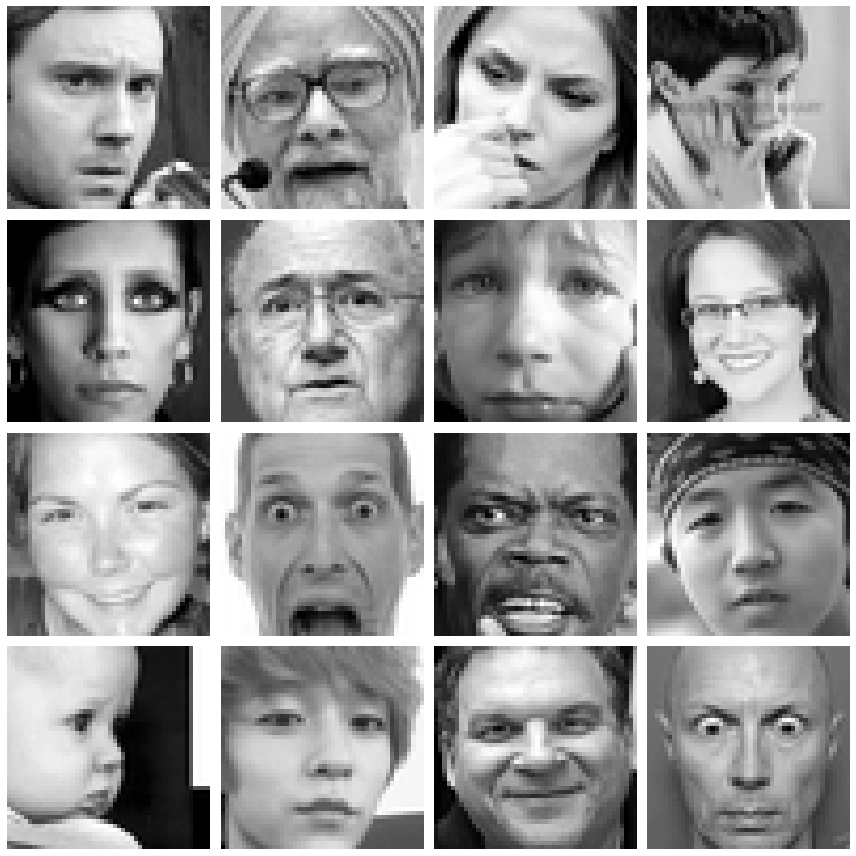

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[i].reshape((48, 48)), cmap="gray")
    plt.axis('off')
    plt.tight_layout()

And, to understand how each image is loaded, we can print any element as a matrix:

In [ ]:
X_train[i].reshape((48, 48))

array([[107., 107., 109., ..., 107., 107., 107.],
       [107., 107., 109., ..., 107., 107., 107.],
       [107., 107., 108., ..., 107., 107., 107.],
       ...,
       [ 94.,  94.,  94., ..., 104., 105.,  98.],
       [ 94.,  94.,  94., ...,  91.,  84.,  86.],
       [ 94.,  94.,  94., ...,  83.,  84., 106.]], dtype=float32)

# Creating our Deep Learning model

Now the interesting part comes to us. Let's build a custom DL model.

## Model architecture

After some research in the state of the art for Facial Expression Recognition,  found that a simple convolutional architecture based on LeNet-5 would achieve nice results. 

Anyway, more recent proposals have achieved more accurate results, and even if Tensorflow already includes prebuilt models (such as MobileNet, which is one of the best model architectures for portable devices), I came up with my own implementation based on a neetwrk architecture which is supposed to be a deep-lightweight accurate model for the FER problem: "[Extended deep neural network for facial emotion recognition (EDNN)]

they assure through some tests that their EDNN gives better results in classification tasks for Facial Expression Recognition, and by the architecture metrics this network turns out to be a more lightweight model compared with others.

In any case, I proceeded to use Tensorflow 2.0 to build my own EDNN implementation with the Keras module.

The implementation will come from two functions:
- One to build the Residual Block
- The second one to build the rest of the model

The residual block architecture is as follows:

<center>
    <img src="https://raw.githubusercontent.com/RodolfoFerro/PyConCo20/full-code/media/residual_block.png" width="25%">
</center>

We can now proceed to build our EDNN model:

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import SGD


def ResidualBlock(prev_layer):
    """Residual block from the EDNN model for FER by Deepak Kumar Jaina,
    Pourya Shamsolmoalib & Paramjit Sehdev, as it appears in "Extended 
    deep neural network for facial emotion recognition", 2019.
    """
    conv_1 = Conv2D(64, (1, 1))(prev_layer)
    conv_2 = Conv2D(64, (3, 3), padding="same")(conv_1)
    shortc = concatenate([conv_1, conv_2], axis=-1)
    conv_3 = Conv2D(128, (3, 3), padding="same")(shortc)
    conv_4 = Conv2D(256, (1, 1))(conv_3)
    output = concatenate([conv_4, prev_layer], axis=-1)
    
    return output


def EDNN(n_classes=7):
    """
    EDNN model for FER by Deepak Kumar Jaina, Pourya Shamsolmoalib &
    Paramjit Sehdev, as it appears in "Extended deep neural network for 
    facial emotion recognition", 2019.
    """

    x = Input(shape=(48, 48, 1))
    y = Conv2D(32, (5, 5), input_shape=(48, 48, 1), strides=(2, 2), 
               data_format='channels_last')(x)
    y = MaxPooling2D(pool_size=(2, 2))(y)
    y = Conv2D(64, (3, 3), strides=(1, 1))(y)
    y = ResidualBlock(y)
    y = Conv2D(128, (3, 3), strides=(1, 1), padding="same")(y)
    y = MaxPooling2D(pool_size=(2, 2))(y)
    y = Conv2D(128, (3, 3), strides=(1, 1))(y)
    y = ResidualBlock(y)
    y = Conv2D(256, (3, 3), strides=(1, 1), padding="same")(y)
    y = MaxPooling2D(pool_size=(2, 2))(y)
    y = Conv2D(512, (3, 3), strides=(1, 1), padding="same")(y)
    y = Flatten()(y)
    y = Dense(1024, activation='relu')(y)
    y = Dropout(0.2)(y)
    y = Dense(512, activation='relu')(y)
    y = Dropout(0.2)(y)
    y = Dense(n_classes, activation='softmax')(y)
    
    # Create model:
    model = Model(x, y)

    # Compile model:
    opt = SGD(lr=LRATE, momentum=0.9, decay=LRATE/EPOCHS)
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt, metrics=['accuracy'])

    return model

We now create an instance of our model and verify the details of the architecture:

In [ ]:
# Set hyperparameters:
EPOCHS = 1
BATCH = 64
LRATE = 1e-4

# Instance model
ednn = EDNN()

In [ ]:
ednn.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 22, 22, 32)   832         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 11, 11, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 9, 9, 64)     18496       max_pooling2d[0][0]              
______________________________________________________________________________________________

## Model training

So far we have created out model and we already have loaded the datset. But beofr, let's create our media folder:

In [ ]:
!mkdir ../media

mkdir: cannot create directory ‘../media’: File exists


We can now proceed to train the model.

In [ ]:
history = ednn.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=EPOCHS, batch_size=BATCH)

Train on 28709 samples, validate on 7178 samples
28709/28709 [==============================] - 508s 18ms/sample - loss: 1.8201 - accuracy: 0.2817 - val_loss: 1.6472 - val_accuracy: 0.3576


After the training, we can plot the history of this process.

The following functions will allow us to do so.

In [ ]:
def plot_loss(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's training loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


def plot_accuracy(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model's training accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

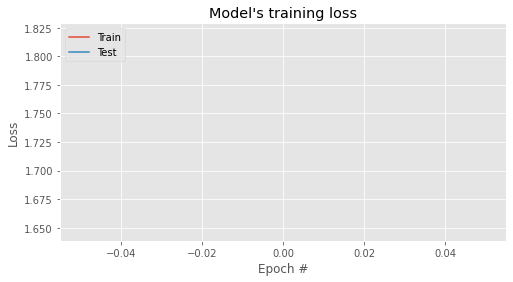

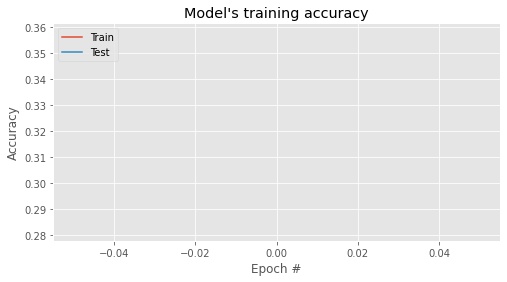

In [ ]:
# Plot loss:
plot_loss(history)
# plt.savefig('../media/loss.png', dpi=300)

# Plot accuracy:
plot_accuracy(history)
# plt.savefig('../media/accuracy.png', dpi=300)

A way to explore accuracy through classes is using a confusion matrix:

In [ ]:
# Create emotions map:
emotion_labels = [
    'Angry',
    'Disgust',
    'Fear',
    'Happy',
    'Sad',
    'Surprise',
    'Neutral'
]

# Predict using trained model:
y_pred = ednn.predict(X_test)
y_pred = np.asarray([np.argmax(e) for e in y_pred])
y_true = np.asarray([np.argmax(e) for e in y_test])

[Text(58.5, 0.5, 'True label'), Text(0.5, 58.5, 'Predicted label')]

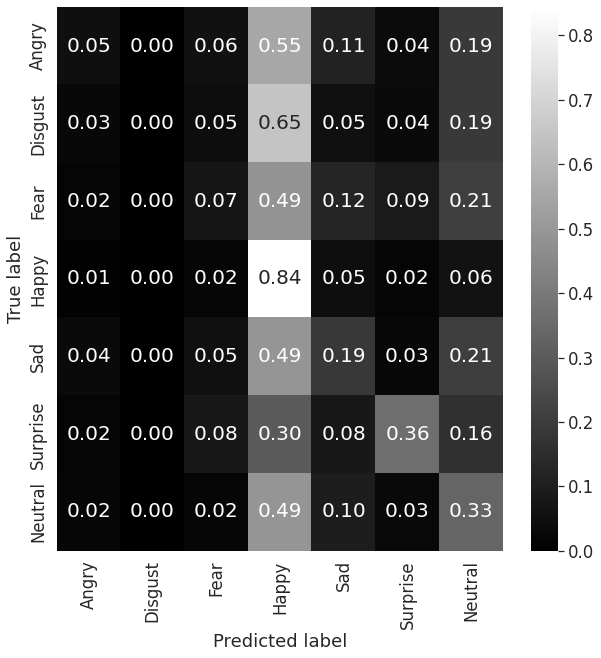

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Compute confusion matrix:
cm = confusion_matrix(y_true, y_pred)
cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix:
sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(cm_normalised, annot=True, linewidths=0, square=False, 
                 cmap='gray', yticklabels=emotion_labels,
                 xticklabels=emotion_labels, vmin=0,
                 vmax=np.max(cm_normalised), fmt=".2f",
                 annot_kws={"size": 20})
ax.set(xlabel='Predicted label', ylabel='True label')

## Saving the trained model

To save the trained model we will basically do two things:

- Serialize the model into a JSON file, which will save the architecture of our model.
- Serialize the weights into a HDF5 file, which will save all parameters of our model.

In [ ]:
# Serialize model to JSON:
json_ednn = ednn.to_json()
with open('../data/model.json', 'w') as json_file:
    json_file.write(json_ednn)

# Serialize weights to HDF5 (h5py needed):
ednn.save_weights('../data/model.h5')
print('Model saved to disk.')

Model saved to disk.




## Downloading the saved model

We just need to import the Google Colab module and download the specified files.

In [ ]:
from google.colab import files

model_files = ['../data/model.json', '../data/model.h5']
for file in model_files:
    files.download(file)

# **Detecting the Object**

##Import OpenCV.

In [ ]:
import cv2 

Since we want to detect the objects in real-time, we will be using the webcam feed. Use the below code to initiate the webcam

In [ ]:
# Enable we
# '0' is default ID for builtin web cam
# for external web cam ID can be 1 or -1
imcap = cv2.VideoCapture(0)
imcap.set(3, 640) # set width as 640
imcap.set(4, 480) # set height as 480

False

As mentioned earlier, OpenCV has various pre-trained HAAR classifiers stored as XML files. In this example, I am using haarcascade_frontalface_defaul a classifier for face detection. You can check other pre-trained classifiers in opencv/data/harrcascades/ folder

In [ ]:
from tensorflow.keras.models import model_from_json

In [ ]:
# importing cascade
model = model_from_json(open("../data/model.json", "r").read())
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

**The next step will be to run the classifier to detect the face in the video feed and the webcam. The basic steps are; first, we capture the frame from the video feed. Next, the captured frame is converted to grayscale. Finally, the grayscale image is passed through the classifier to detect the required object.**

In [ ]:
while True:
    image=imcap.read()

    coverted_image= cv2.cvtColor(np.float32(image), cv2.COLOR_BGR2GRAY)


    faces_detected = face_haar_cascade.detectMultiScale(converted_image)
    for (x,y,w,h) in faces_detected:
      cv2.rectangle(test_image,(x,y), (x+w,y+h), (255,0,0))
      roi_gray=gray_image[y:y+w,x:x+h]
      roi_gray=cv2.resize(roi_gray,(48,48))
      image_pixels = image.image_to_array(roi_gray)
      image_pixels = np.expand_dims(image_pixels, axis = 0)
      image_pixels /= 255


    predictions = model.predict(image_pixels)
    max_index = np.argmax(predictions[0])

    emotion_detection = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    emotion_prediction = emotion_detection[max_index]


    cv2.putText(test_image, emotion_prediction, (int(x), int(y)))
    cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)  


    resize_image = cv2.resize(image, (1000, 700))
    cv2.imshow('Emotion',resized_image)
    if cv2.waitKey(10) == ord('q'):
        break


cap.release()
cv2.destroyAllWindows